In [ ]:
#
# hw4pr1births_modeler:  birth classification by month + day    (above/below median: 190942)
#

In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [2]:
# let's read in our flower data...
# 
# births_cleaned.csv and births_cleaner.ipynb should be in this folder
# 
filename = 'births_cleaned.csv'
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

births_cleaned.csv : file read into a pandas dataframe.


In [3]:
#
# different version vary on how to see all rows (adapt to suit your system!)
#
print(f"df_tidy.shape is {df_tidy.shape}\n")
df_tidy.info()  # prints column information

# let's print the whole dataframe, too  (adapt # of lines, as desired)
# pd.options.display.max_rows = 150   # None for no limit; default: 10
pd.options.display.min_rows = 150   # None for no limit; default: 10
# pd.options.display.max_rows = 10   # None for no limit; default: 10
# pd.options.display.min_rows = 10   # None for no limit; default: 10
df_tidy

df_tidy.shape is (366, 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 371
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   month               366 non-null    int64
 1   day                 366 non-null    int64
 2   above/below median  366 non-null    int64
dtypes: int64(3)
memory usage: 11.4 KB


,month,day,above/below median
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,0
5,1,6,0
6,1,7,0
7,1,8,0
8,1,9,0
9,1,10,0


In [33]:
#
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place 
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_tidy.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")

CATEGORIES = ['month', 'day', 'above/below median']
OUTPUTS = ['below median', 'above median']
OUTPUTS_INDEX = {'below median': 0, 'above median': 1}

for name in OUTPUTS:
    print(f"{name} maps to {OUTPUTS_INDEX[name]}")

COLUMNS is Index(['month', 'day', 'above/below median'], dtype='object')

COLUMNS[0] is month

COL_INDEX is {'month': 0, 'day': 1, 'above/below median': 2}


below median maps to 0
above median maps to 1


In [21]:
#
# let's convert our dataframe to a numpy array, named A
#
df_model1 = df_tidy             # Just to make life easier for me...
A = df_model1.to_numpy()   
print(A)

[[ 1  1  0]
 [ 1  2  0]
 [ 1  3  0]
 ...
 [12 29  1]
 [12 30  1]
 [12 31  1]]


In [22]:
#
# let's make sure it's all floating-point
#
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)

[[ 1.  1.  0.]
 [ 1.  2.  0.]
 [ 1.  3.  0.]
 ...
 [12. 29.  1.]
 [12. 30.  1.]
 [12. 31.  1.]]


In [23]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 366 rows and 3 cols


In [32]:
# let's use all our variables, to reinforce that we have
# (1) their names...
# (2) access and control over each...

# choose a row index, n:
n = 42
print(f"Birthday #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

median_index = COL_INDEX['above/below median']
median_num = int(round(A[n][median_index]))
median = CATEGORIES[median_num]

Birthday #42 is [ 2. 12.  1.]
  Its month is 2.0
  Its day is 12.0
  Its above/below median is 1.0


In [25]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:2]  # X (features) ... is all rows, columns 0, 1
y_all = A[:,2]    # y (labels) ... is all rows, column 2 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 

In [26]:
#
# we scramble the data, to remove (potential) dependence on its ordering: 
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list
# print(indices)

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels/species are 
 [1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 

In [27]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_permed, y_permed, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 292 rows;  testing with 74 rows

Held-out data... (testing data: 74)
y_test: [1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0.]

X_test (few rows): [[ 8. 20.]
 [ 7. 11.]
 [ 7. 17.]
 [ 8. 11.]
 [ 5.  1.]]

Data used for modeling... (training data: 292)
y_train: [0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1

In [28]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a DT model and train it! 
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 1


In [29]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = dtree_model.predict(X_test)   
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1.]
Actual  labels  : [1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0.]

Results on test set:  59 correct out of 74 total.


In [30]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {p:>12d} {a:<12d}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)


row   0 :            1 1              
row   1 :            1 1              
row   2 :            1 1              
row   3 :            1 1              
row   4 :            0 0              
row   5 :            1 1              
row   6 :            1 1              
row   7 :            1 1              
row   8 :            0 0              
row   9 :            0 0              
row  10 :            0 0              
row  11 :            0 0              
row  12 :            1 0              incorrect
row  13 :            0 0              
row  14 :            0 0              
row  15 :            0 1              incorrect
row  16 :            1 1              
row  17 :            1 1              
row  18 :            0 0              
row  19 :            0 0              
row  20 :            1 1              
row  21 :            1 0              incorrect
row  22 :            1 1              
row  23 :            1 1              
row  24 :            1 1             

59

In [34]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names
                            filled=True,              
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=OUTPUTS,       
                            leaves_parallel=True )    

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="month <= 5.5\ngini = 0.5\nsamples = 292\nvalue = [146, 146]\nclass = below median", fillcolor="#ffffff"] ;
1 [label="gini = 0.192\nsamples = 121\nvalue = [108, 13]\nclass = below median", fillcolor="#e89051"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.346\nsamples = 171\nvalue = [38, 133]\nclass = above median", fillcolor="#72b9ec"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


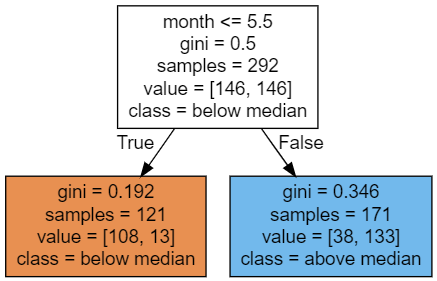

In [36]:
from IPython import display
display.Image("./births_tree1.png", width=400)  # be sure it has the right name, and is in this directory...

In [37]:
#
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,50):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d

    
    
# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} with acc: {best_accuracy} is our underfitting/overfitting balance.")  

depth:  1  cv accuracy:  0.8086
depth:  2  cv accuracy:  0.8086
depth:  3  cv accuracy:  0.8392
depth:  4  cv accuracy:  0.8153
depth:  5  cv accuracy:  0.8188
depth:  6  cv accuracy:  0.8189
depth:  7  cv accuracy:  0.8221
depth:  8  cv accuracy:  0.8288
depth:  9  cv accuracy:  0.8220
depth: 10  cv accuracy:  0.8323
depth: 11  cv accuracy:  0.8357
depth: 12  cv accuracy:  0.8358
depth: 13  cv accuracy:  0.8323
depth: 14  cv accuracy:  0.8324
depth: 15  cv accuracy:  0.8358
depth: 16  cv accuracy:  0.8323
depth: 17  cv accuracy:  0.8323
depth: 18  cv accuracy:  0.8289
depth: 19  cv accuracy:  0.8324
depth: 20  cv accuracy:  0.8324
depth: 21  cv accuracy:  0.8323
depth: 22  cv accuracy:  0.8323
depth: 23  cv accuracy:  0.8289
depth: 24  cv accuracy:  0.8358
depth: 25  cv accuracy:  0.8289
depth: 26  cv accuracy:  0.8323
depth: 27  cv accuracy:  0.8289
depth: 28  cv accuracy:  0.8289
depth: 29  cv accuracy:  0.8324
depth: 30  cv accuracy:  0.8323
depth: 31  cv accuracy:  0.8289
depth: 3

In [38]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 3


In [39]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,             
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=OUTPUTS,        
                            leaves_parallel=True )    

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="month <= 5.5\ngini = 0.5\nsamples = 292\nvalue = [146, 146]\nclass = below median", fillcolor="#ffffff"] ;
1 [label="month <= 3.5\ngini = 0.192\nsamples = 121\nvalue = [108, 13]\nclass = below median", fillcolor="#e89051"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="month <= 1.5\ngini = 0.275\nsamples = 73\nvalue = [61, 12]\nclass = below median", fillcolor="#ea9a60"] ;
1 -> 2 ;
3 [label="gini = 0.128\nsamples = 29\nvalue = [27, 2]\nclass = below median", fillcolor="#e78a48"] ;
2 -> 3 ;
4 [label="gini = 0.351\nsamples = 44\nvalue = [34, 10]\nclass = below median", fillcolor="#eda673"] ;
2 -> 4 ;
5 [label="day <= 19.5\ngini = 0.041\nsamples = 48\nvalue = [47, 1]\nclass = below median", fillcolor="#e6843d"] ;
1 -> 5

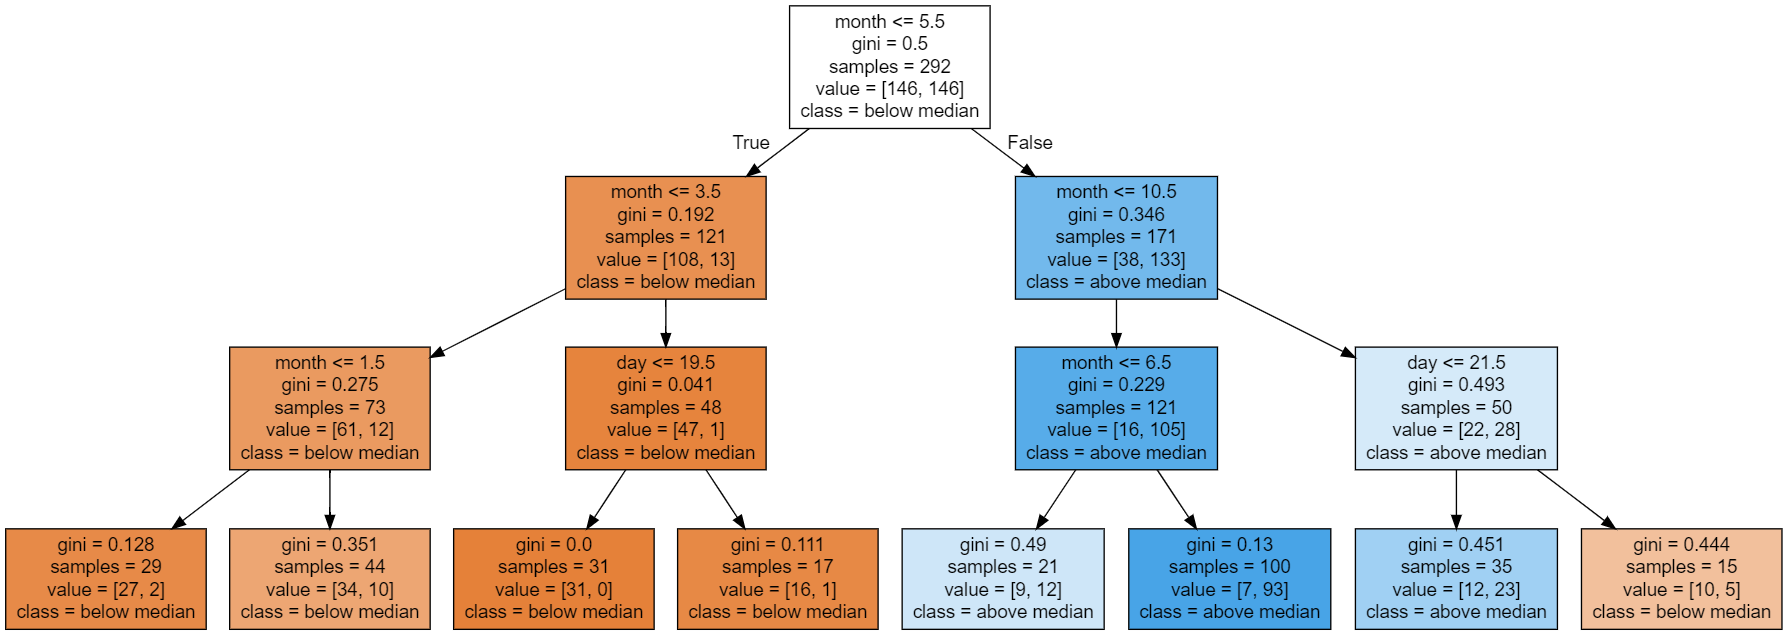

In [43]:
#
# You will likely have a different name...
#
from IPython import display
display.Image("./births_tree2.png", width=600)  # adjust for your tree!

In [44]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1.]
Actual labels: [1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0.]

row   0 :            1 1              
row   1 :            1 1              
row   2 :            1 1              
row   3 :            1 1              
row   4 :            0 0              
row   5 :            1 1              
row   6 :            1 1              
row   7 :            1 1              
row   8 :            0 0              
row   9 :            0 0              
row  10 :            0 0              
row  11 :            0 0              
row  12 :            0 0              
row  

63

In [45]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth) 

Created and trained a 'final' DT classifier with max depth = 3


In [48]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of two features 
                [ month, day ]
        output: the predicted births counter that is above(1) or below(0) the median)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = dtree_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = OUTPUTS[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [10.,5.]    # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict above median (1) from Features [10.0, 5.0]


In [49]:
#
# try it on new, "unseen" data!
#



LoD = [[10,4.2],
[1.5,1.5],
[2,-1],
[-10,0],
[0,0],
[2,32],
[9.2,6.5],
[3.14159,2.71828],
[42,42]]
      
for Features in LoD:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")


I predict above median (1) from Features [10, 4.2]
I predict below median (0) from Features [1.5, 1.5]
I predict below median (0) from Features [2, -1]
I predict below median (0) from Features [-10, 0]
I predict below median (0) from Features [0, 0]
I predict below median (0) from Features [2, 32]
I predict above median (1) from Features [9.2, 6.5]
I predict below median (0) from Features [3.14159, 2.71828]
I predict below median (0) from Features [42, 42]


In [50]:
#
# feature importances!
# 
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked 
# 
# feature importances are often even more "important" than predictions, 
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.95126802 0.04873198]

Feature        month has   95.13% of the decision-making importance.
Feature          day has    4.87% of the decision-making importance.


In [51]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#       
# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, 
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)  
# This max_samples=0.5 is the fraction of rows to use for each DT 
# For all of our forests, we will let max_samples be 0.5   We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")  

Built an RF with depth=1 and number of trees=42


In [52]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1.]
Actual  labels  : [1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0.]

Results on test set:  59 correct out of 74 total.
row   0 :            1 1              
row   1 :            1 1              
row   2 :            1 1              
row   3 :            1 1              
row   4 :            0 0              
row   5 :            1 1              
row   6 :            1 1              
row   7 :            1 1              
row   8 :            0 0              
row   9 :            0 0              
row  10 :            0 0              
row  11 :            0 0      

59

In [53]:
#
# we can get the individual trees, if we want...
#
tree_index = 28   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,             
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=OUTPUTS,      
                            leaves_parallel=True )   
                            
print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=728011978)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="day <= 8.5\ngini = 0.497\nsamples = 114\nvalue = [67, 79]\nclass = above median", fillcolor="#e1f0fb"] ;
1 [label="gini = 0.496\nsamples = 34\nvalue = [24, 20]\nclass = below median", fillcolor="#fbeade"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.488\nsamples = 80\nvalue = [43, 59]\nclass = above median", fillcolor="#c9e4f8"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


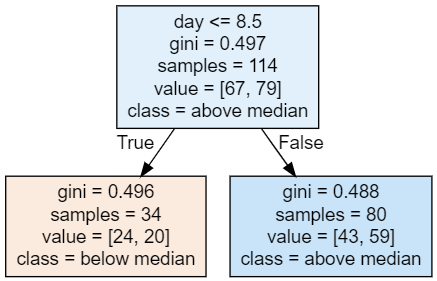

In [54]:
#
# add locally, to this notebook...
#

from IPython import display
display.Image("./births_tree3.png", width=300)  

In [57]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1         # range(1,6)
best_ntrees = 50   # [50,150,250]
best_accuracy = 0

for d in range(1,8):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees


best_depth = best_d   
best_num_trees = best_ntrees

# This will be incorrect when initially run:
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")  


depth:  1 ntrees:  50 cv accuracy:  0.8154
depth:  1 ntrees: 150 cv accuracy:  0.8154
depth:  1 ntrees: 250 cv accuracy:  0.8086
depth:  2 ntrees:  50 cv accuracy:  0.8086
depth:  2 ntrees: 150 cv accuracy:  0.8120
depth:  2 ntrees: 250 cv accuracy:  0.8086
depth:  3 ntrees:  50 cv accuracy:  0.8153
depth:  3 ntrees: 150 cv accuracy:  0.8018
depth:  3 ntrees: 250 cv accuracy:  0.8154
depth:  4 ntrees:  50 cv accuracy:  0.8222
depth:  4 ntrees: 150 cv accuracy:  0.8393
depth:  4 ntrees: 250 cv accuracy:  0.8324
depth:  5 ntrees:  50 cv accuracy:  0.8598
depth:  5 ntrees: 150 cv accuracy:  0.8529
depth:  5 ntrees: 250 cv accuracy:  0.8393
depth:  6 ntrees:  50 cv accuracy:  0.8495
depth:  6 ntrees: 150 cv accuracy:  0.8393
depth:  6 ntrees: 250 cv accuracy:  0.8428
depth:  7 ntrees:  50 cv accuracy:  0.8530
depth:  7 ntrees: 150 cv accuracy:  0.8428
depth:  7 ntrees: 250 cv accuracy:  0.8395

best_depth: 5 and best_num_trees: 50 are our choices. Acc: 0.8597895967270602


In [58]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests
best_depth = best_depth
best_num_trees = best_num_trees
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=50


In [59]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1.]
Actual  labels  : [1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0.]

Results on test set:  63 correct out of 74 total.
row   0 :            1 1              
row   1 :            1 1              
row   2 :            1 1              
row   3 :            1 1              
row   4 :            0 0              
row   5 :            1 1              
row   6 :            1 1              
row   7 :            1 1              
row   8 :            0 0              
row   9 :            0 0              
row  10 :            0 0              
row  11 :            0 0      

63

In [60]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=50


In [62]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of two features 
                [ month, day ]
        output: the predicted births that are either above(1) or below(0) the median
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = rforest_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = OUTPUTS[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [10., 5.]   # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict above median (1) from Features [10.0, 5.0]


In [63]:
#
# try it on new, "unseen" data!
#

# Less unseen than in hw4, admittedly!

LoD = [[10,4.2],
[1.5,1.5],
[2,-1],
[-10,0],
[0,0],
[2,32],
[9.2,6.5],
[3.14159,2.71828],
[42,42]]
      
for Features in LoD:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

# these flowers' coded species: 012001122

I predict above median (1) from Features [10, 4.2]
I predict below median (0) from Features [1.5, 1.5]
I predict below median (0) from Features [2, -1]
I predict below median (0) from Features [-10, 0]
I predict below median (0) from Features [0, 0]
I predict below median (0) from Features [2, 32]
I predict above median (1) from Features [9.2, 6.5]
I predict below median (0) from Features [3.14159, 2.71828]
I predict above median (1) from Features [42, 42]


In [64]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.77075346 0.22924654]

Feature        month has   77.08% of the decision-making importance.
Feature          day has   22.92% of the decision-making importance.
